## 读取文件

读取用户上传的文件，并加上标题列便于之后的数据筛选。在读取后进行第一次数据清理，将包含空值的行删除。

In [51]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
header = ['企业编码','排污口编码','污染物编码','记录时间','污染物浓度','污染物排放量']
pollution = pd.read_csv("all_data_mini.csv", names=header, encoding='utf-8', low_memory=False)
pollution.dropna()
pollution.head()

,企业编码,排污口编码,污染物编码,记录时间,污染物浓度,污染物排放量
0,17280000089583,64000000000600100000,w00000,1/1/2020 00:00:00,66.25,870.00
1,17280000089583,64000000000600100000,w00000,2/1/2020 00:00:00,73.18,1758.00
2,17280000089583,64000000000600100000,w00000,3/1/2020 00:00:00,79.95,1918.00
3,17280000089583,64000000000600100000,w00000,4/1/2020 00:00:00,69.91,1678.00
4,17280000089583,64000000000600100000,w00000,5/1/2020 00:00:00,NaN,74.00


## 数据清理

将读取到变量 pollution 的数据进行重新构造，原始数据由企业编码进行索引，不方便进行计算，首先先需要将记录时间设置为第一索引，将企业编码和排污口编码设置为第二索引。其次需要吧污染物排放量和污染物浓度的数据由列转换为行，将污染物的名称作为列标题，这样就大大减少了数据的行数，每行乘载了更多的信息。在这一步中包含了对数据进行的第二次清理，由于每个公司记录的污染物完善程度不相同，有的公司记录的污染物非常完全，有的公司记录的污染物比较少，但是对于之后的聚类算法来说，污染物的类目数量要是一个定值，所以对被提及的次数比较少的污染物进行清除处理，清除规则是：每个污染物的记录条数取平均，记录条数大于平均值的污染物数据以予保留，记录条数小于平均值的污染物数据被考虑为价值小的数据，就将其清除。第三步，对重新构造好的数据集进行最后一次清理，删除包含空值的行，然后将数据存于 pollution_vaild 变量中，等待下一步使用。

In [52]:
# pollution = pollution.sort_values(by=["记录时间", "企业编码", "排污口编码"])
# pollution.set_index(["记录时间", "企业编码","排污口编码"])
pollution_shaped = pd.pivot_table(pollution,index =["记录时间", "企业编码","排污口编码"],values=["污染物浓度", "污染物排放量"],columns='污染物编码')
pollution_mean = pollution_shaped.count(axis=0).mean()
for key, count in pollution_shaped.count(axis=0).items():
    if count < pollution_mean:
        pollution_shaped.drop(key, axis=1, inplace=True)
pollution_vaild = pollution_shaped.dropna()
pollution_vaild

污染物排放量           \
污染物编码                                                         w00000   w01018   
记录时间              企业编码               排污口编码                                      
1/1/2020 00:00:00 17280000089583     64000000000600100000     870.00    24.68   
                  17285400089799     64020000001400100000   12846.63   175.63   
                  17285400092175     64020000010200100000   26395.88   457.63   
                  17285400094119     64020000017400100000   23238.49   417.09   
                  17285400094281     64020000018000100000  401160.00  5384.04   
...                                                              ...      ...   
9/9/2021 00:00:00 173073790800316000 858478549655269        40882.00 11405.81   
                  173074870800270000 64101804000066900000   43219.42   464.40   
                                     862421960092595        50279.02 12350.50   
                  173124010800441000 365395341441545000    104594.80  1405.96   
                                     861530565307315        65296.04 13564.06   

                                                                            \
污染物编码                                                       w21001  w21003   
记录时间              企业编码               排污口编码                                   
1/1/2020 00:00:00 17280000089583     64000000000600100000    10.17    0.32   
                  17285400089799     64020000001400100000    84.36    7.78   
                  17285400092175     64020000010200100000   263.31   13.07   
                  17285400094119     64020000017400100000    98.70   13.73   
                  17285400094281     64020000018000100000  4049.80  337.27   
...                                                            ...     ...   
9/9/2021 00:00:00 173073790800316000 858478549655269       1643.50 1170.93   
                  173074870800270000 64101804000066900000   332.24    1.86   
                                     862421960092595       2486.51 1640.31   
                  173124010800441000 365395341441545000     957.36    6.80   
                                     861530565307315        907.46 1279.40   

                                                                    污染物浓度  \
污染物编码                                                      w21011  w00000   
记录时间              企业编码               排污口编码                                  
1/1/2020 00:00:00 17280000089583     64000000000600100000    0.05   66.25   
                  17285400089799     64020000001400100000    1.23  148.90   
                  17285400092175     64020000010200100000    1.11  305.51   
                  17285400094119     64020000017400100000    0.76  268.98   
                  17285400094281     64020000018000100000   35.18 4643.10   
...                                                           ...     ...   
9/9/2021 00:00:00 173073790800316000 858478549655269       178.19  474.00   
                  173074870800270000 64101804000066900000    2.09  500.20   
                                     862421960092595        91.43  581.90   
                  173124010800441000 365395341441545000     18.34 1226.70   
                                     861530565307315        39.75  755.70   

                                                                          \
污染物编码                                                      w01001 w01018   
记录时间              企业编码               排污口编码                                 
1/1/2020 00:00:00 17280000089583     64000000000600100000    8.62  28.39   
                  17285400089799     64020000001400100000    7.67  19.41   
                  17285400092175     64020000010200100000    7.90  17.34   
                  17285400094119     64020000017400100000    7.62  11.98   
                  17285400094281     64020000018000100000    7.22  13.42   
...                                                           ...    ...   
9/9/2021 00:00:00 173073790800316000 858478549655269         6.89 278.9

/Users/junpenglu/git/Illegal-pollution/env/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/junpenglu/git/Illegal-pollution/env/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


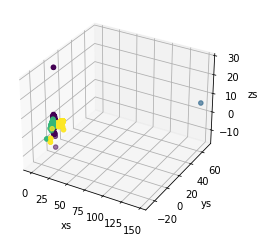

In [55]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA as PCA
from sklearn.preprocessing import StandardScaler

def read_data(filename):
    header = ['企业编码','排污口编码','污染物编码','记录时间','污染物浓度','污染物排放量']
    pollution = pd.read_csv(filename, names=header, encoding='utf-8', low_memory=False)
    pollution.dropna()

    pollution_shaped = pd.pivot_table(pollution,index =["记录时间", "企业编码","排污口编码"],values=["污染物浓度", "污染物排放量"],columns='污染物编码')
    pollution_mean = pollution_shaped.count(axis=0).mean()
    for key, count in pollution_shaped.count(axis=0).items():
        if count < pollution_mean:
            pollution_shaped.drop(key, axis=1, inplace=True)
    return pollution_shaped.dropna()

def pca(input_data,outfile):
    X_data1 = input_data#聚类数据，
    Sta=StandardScaler()###加标准化，不想要标准化可以注释掉这两句
    Sta.fit(X=X_data1)####标准化用均值跟方差算的，对有个别极值的点不敏感
    # MM=MinMaxScaler()#######最大最小归一化，现在是屏蔽的，想用这个可以取消屏蔽，这个和标准化只能选一个用
    # MM.fit(X=X_data1)#####最大最小归一化是用最大值和最小值算的，对极值比较敏感，这里可能不适用
    
    X_data1=Sta.transform(X_data1)
    pca = PCA(n_components=3)
    pca = pca.fit(X_data1)#降维
    X_dr = pca.transform(X_data1)#执行降维
    kmeans = KMeans(n_clusters=4,init='k-means++', n_init=10,  max_iter=300, tol=0.0001,
           verbose=0,  random_state=None,  copy_x=True,   algorithm='auto'
           )#使用Kmeans聚类，聚2类，初始化方式k-means++，随机初始质心10，最大迭代次数300，相关的扰动在两次迭代的聚类中心，
    kmeans.fit(X_data1)
    y_kmeans = kmeans.predict(X_data1)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for c, m, zlow, zhigh in [('r', 'o', -500, -250), ('b', '^', -300, -50)]:
        xs =X_dr[:,0]
        ys = X_dr[:,1]
        zs = X_dr[:,2]
        ax.scatter(xs, ys, zs, c=y_kmeans, marker='o')
    ax.set_xlabel('xs')
    ax.set_ylabel('ys')
    ax.set_zlabel('zs')
    plt.show()
    name_index = []
    for ind in input_data.index:
        list_ind = list(ind)
        list_ind.append("")
        name_index.append(",".join(map(str,list_ind)))
    name=np.reshape(name_index,(-1,1))
    y_kmeans=np.reshape(y_kmeans,(-1,1))
    out=np.concatenate((name,y_kmeans),axis=1)
    np.savetxt(outfile,out,fmt='%s')

def do_calc(infile, outfile):
    pollution_vaild = read_data(infile)
    pca(pollution_vaild, outfile)

do_calc("all_data_mini.csv", "result.csv")